<a href="https://colab.research.google.com/github/1kruidenp/PRA3500/blob/master/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: Generate 10, 1000 and 100,000 random numbers and make graphs of 𝑥𝑖 on
the y-axis and 𝑥𝑖+1 on the x-axis.

Result: From my results, we can see that there is no pattern in the random class that is imported. This is only truly seen when 10000 numbers are generated and no clusters are not graphed within the figure. The code is described using comments in green.

In [0]:
#Here we import useful libraries including random which is used to create our random numbers
import matplotlib.pyplot as plt
import numpy as np
import random

#In this function we create two arrays, one of which is filled with xi and the other with xi+1. 
#They are filled using a loop. It takes one input which determines the size of the list, which is the number of random numbers generated
#The two lists are then plotted.
def randomlist(xsize):
  xlist=[0]*xsize
  ylist=[0]*xsize
  i=0
  for i in range(xsize):
    ylist[i]=random.random()
    i=i+1
  j=0
  for j in range(xsize-1):
    xlist[j]=ylist[j+1]
    j=j+1
  plt.plot(xlist,ylist,'o')
  return(xlist,ylist)




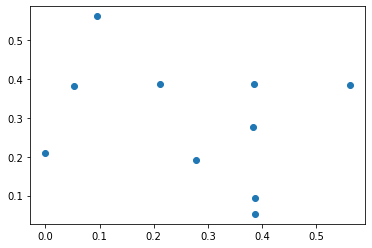

In [2]:
#Here we plot 10 points, no pattern is seen here but there are not enough points to create any conclusions
rand10=randomlist(10)


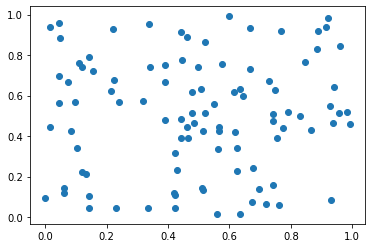

In [3]:
#Here we plot 100 points, no clear trend is seen.
rand100=randomlist(100)

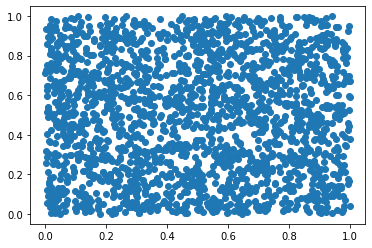

In [4]:
#Here we plot 2000 points, some empty spaces are seen which may show some fault in the random number generator
# but this can only be confirmed by plotting more numbers
rand5000=randomlist(2000)

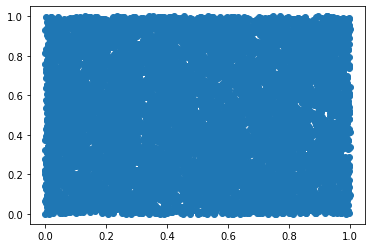

In [5]:
#When plotting 10000 numbers, no empty clusters are seen, so no real confirmation of a trend can be made.
rand10000=randomlist(10000)

Task: divide your simulation into many time steps (much smaller than 𝑡1/
2) and or each atom in each time step, generate a random number, if random number is bigger than p, then the atom decays.
Record the number of atoms which have decayed and the number remaining at the
end of each time step at the end of the simulation, plot this on a graph.

Result: When graphing what was asked for the task, it wasnt what i expected. I expected that the number of atoms would be half of what it initially was at the halflife time. However what i found was that the number of atoms decrease much quicker than expected. This is because the probability at the halflife is 0.5, but by then some atoms have already decayed to previous probabilities. 
I compared this to the other equation given in the task, which was then plotted in red. This did follow the trend i explained earlier. 
Finally I wanted to show that this trend can be achieved using the initial function. However this time after each test, I reset the number of atoms to the intial. Now when the probability is 0.5 at the halflife, we see that half the atoms have decayed, and at two times the halflife, 1/4 of the atoms are left.

In green I leave comments to explain the code.

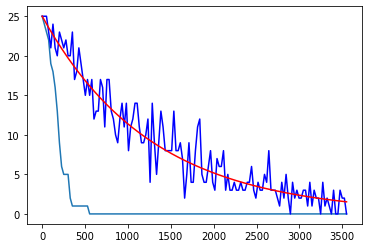

In [6]:

#here we choose the halflife of the atoms. I chose 881 seconds as this is the halflife of a free neutron which seems like an interesting topic.
halflife=881
#The timestep was chosen so that we would have suffiecient iterations until we reach the half life. This smooths the curve.
timestep=25
#n is the number of atoms, we change in this in each block.
n=25

#Here we create a function that returns the probability of an atom decaying at a specific time point. 
#This is according to the equation given in the tasks.
def Prob(t,hflf):
  return 1-2**(-t/hflf)


#This function takes a number oof atoms as well as the timestep and halflife and for each atom, it generates a random number between 0 and 1. 
#This number is coompared to the probability of it decaying at the specific timestep(which updates at the end of the loop) 
#and if it is lower, it decays(becomes 0). Else it is assigned a 1.
#At the end of the loop it I count how many 1's are left in the list and this number is added to a new list, 
#which represnents the number of atoms after each timestep
#This list is returned.
#This is plotted later in ocean blue
def AtomNumTask(hflf,n,ts):
  t=0
  numatoms=[0]
  j=0
  while t<(hflf*4):
    atoms=[1]*n
    i=0
    for i in range(n):
      test=random.random()
      P=Prob(t,hflf)
      if P>test:
        atoms[i]=0
      elif P<=test:
        atoms[i]=1
    atoms = [i for i in atoms if i != 0]
    numatoms.insert(j,len(atoms))
    j=j+1
    n=len(atoms)
    t=t+ts
  return numatoms


#Here a similar function is made, except this time we dont delete the atoms that are decayed. 
#This is plotted later in dark blue
def AtomNumReal(hflf,n,ts):
  t=0
  numatoms=[0]
  j=0
  while t<(hflf*4):
    atoms=[1]*n
    i=0
    for i in range(n):
      test=random.random()
      P=Prob(t,hflf)
      if P>test:
        atoms[i]=0
      elif P<=test:
        atoms[i]=1  
    numatoms.insert(j,atoms.count(1))
    j=j+1
    t=t+ts
  return numatoms

#This function describes the equation 𝑁(𝑡) = 𝑁0 × 2^𝑡/t1/2 given in the task booklet.
#This is done to compare the discrete results and the function itself shows a continuous solution.
def NumFunction(n,hflf,T):
  FY=[0]*len(T)
  for i in range(len(T)):
    FY[i]=n*2**(-T[i]/hflf)
  return FY

#Here we call the first function, and plot it against time T, which is an equally spaced(spaced by timestep) list.
#It is plotted in light blue
Y=AtomNumTask(halflife,n,timestep)
T=np.linspace(0,timestep*len(Y),len(Y))
plt.plot(T,Y)
  
#Here we plot the second in dark blue against T as well.
RY=AtomNumReal(halflife,n,timestep)
plt.plot(T,RY,'b')

#Here the continuous function is plotted to compare, it is plotted in red.
FY=NumFunction(n,halflife,T)
plt.plot(T,FY,'r')

#RESULTS
#Light blue shows a real life example of 25 free neutrons, 
#it is different from the others as even when the probabilities for each atoms is the same, 
#there are different amounts of atoms being tested against the probability and so it decreases much rapidly compared to 
#The continuous example and the discrete example of when the number of atoms is reset each time.
#The dark blue line is so spiky as there are only 25 atoms and so even with one or two outliers in the data it will spike to the expected
#In the other graphs you will see it smoothen out as more atoms are introduced.


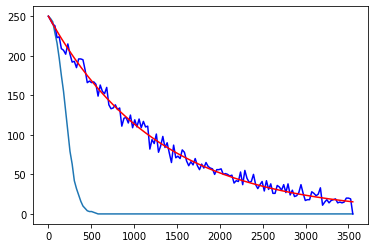

In [7]:

n=250
Y=AtomNumTask(halflife,n,timestep)
T=np.linspace(0,timestep*len(Y),len(Y))
plt.plot(T,Y)
  
RY=AtomNumReal(halflife,n,timestep)
plt.plot(T,RY,'b')

FY=NumFunction(n,halflife,T)
plt.plot(T,FY,'r')

#Below 250 atoms are shown decaying.
#Both light blue and dark blue seem to be more smooth and it is more clear that dark blue follows the red line and the light blue does not.
#This is even more clear in the final example

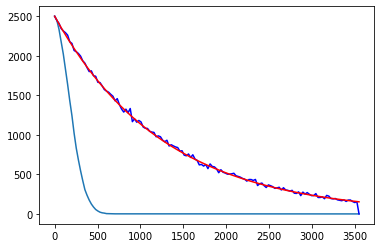

In [8]:
n=2500
Y=AtomNumTask(halflife,n,timestep)
T=np.linspace(0,timestep*len(Y),len(Y))
plt.plot(T,Y)
  
RY=AtomNumReal(halflife,n,timestep)
plt.plot(T,RY,'b')

FY=NumFunction(n,halflife,T)
plt.plot(T,FY,'r')

#Here 2500 atoms are tested and the lines seem extremely smooth. It is also very clear that light blue does not follow the same trend.
#This is due to the reason said before.

Task: Create a deck of cards, shuffle the deck (randomize) and then draw 5 cards.
Create a check to see if you have any hands of cards which would satisfy the
criteria in the standard rules of poker.
Repeat the task sufficient times to generate statistics. Does your model follow the expected pattern?

Results: This task i felt I did very inefficiently. I did it but it took much more effort than needed. What I did was create a deck of cards with suits (D,C,H,and S) and in each suit it is numbered from 1-13.
This was then shuffled and then 5 cards were drawn. These were split into a tuple which had one element showing the suit and the other the number. Using the number we sorted the hand from lowest to highest and then tested the hand against many if and else statements to see what hand was drawn. These if and else statements were tested to see if the criteria set worked for each type of hand. At first the flush seemed to be drawn too many times but this was because there was two diamond suits and no spades. This after 3 painful hours was figured out. The result was then put in a list and then the frequency of each result was plotted in a histogram.


[['S', 9], ['H', 11], ['S', 11], ['H', 12], ['S', 12]]
[['S', 7], ['H', 9], ['H', 10], ['D', 12], ['H', 13]]
[['S', 3], ['D', 6], ['C', 6], ['D', 10], ['H', 12]]
[['S', 3], ['D', 4], ['D', 7], ['H', 10], ['C', 11]]
[['C', 5], ['S', 7], ['H', 7], ['D', 8], ['D', 12]]
[['C', 4], ['D', 5], ['H', 5], ['S', 8], ['H', 10]]
[['S', 4], ['H', 6], ['H', 7], ['S', 11], ['C', 12]]
[['H', 2], ['H', 3], ['H', 5], ['D', 8], ['H', 10]]
[['S', 5], ['S', 8], ['H', 8], ['S', 13], ['D', 13]]
[['D', 2], ['S', 3], ['H', 4], ['S', 6], ['H', 7]]


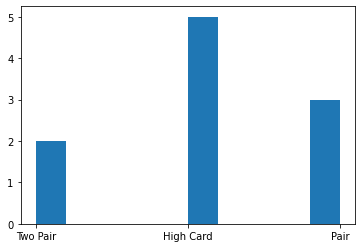

['Royal Flush', 'Straight Flush', 'Four of a kind', 'Full House', 'Flush', 'Straight', 'Three of a kind', 'Two Pair', 'Pair', 'High Card']

[0, 0, 0, 0, 0, 0, 0, 2, 3, 5]


In [9]:


#This list shows all possibilities of the hands that can be drawn, it is used later on.
 pos_hands=['Royal Flush','Straight Flush','Four of a kind','Full House','Flush','Straight','Three of a kind' ,'Two Pair','Pair','High Card']

#Using the link below i found how to create a matrix with 4 columns of 13 rows, each column was then assigned a suit and each row a number.
#Then each column was added to each other to create a list with all the cards.
#Each card has the suit and then the number with a '.' in between it. This is done to split the number and suit up, 
#which is useful to check for any combination. within the hand
#https://stackoverflow.com/questions/6667201/how-to-define-a-two-dimensional-array-in-python
w, h = 13, 4;
def create(w,h):
  cards = [[0 for x in range(w)] for y in range(h)] 
  i=0
  j=0
  for i in range(13):
    j=i+1
    cards[0][i]='D'+'.'+str(j)
    cards[1][i]='C'+'.'+str(j)
    cards[2][i]='H'+'.'+str(j)
    cards[3][i]='S'+'.'+str(j)
  Cards=cards[0]+cards[1]+cards[2]+cards[3]
  return Cards


#This function takes all the cards we created in the function before and shuffles it.
#It then takes the first five of the shuffled deck and returns that as the hand
def draw(deck):
  random.shuffle(deck)
  final=[0]*5
  for i in range(5):
    final[i]=deck[i]
  return final


#This function splits the suit from the number. It does that by making each element of the list a tuple, which has the form (suit,number)
#It splits everything left from the '.' from that on the right
#This makes it easier to recognize  certain hands as well as to sort the hands which is done in the next function
def split(hand):
  x=[0]*5
  i=0
  for i in range(5):
    x[i] = hand[i].split(".")
  return(x)

#Here we sort the hand from smallest number to largest, this is done to find combinations of hands easier
def sort(hand):
  for i in range(5) : 
      hand[i][1] = int(hand[i][1]) 
  hand.sort(key = lambda x: x[1]) 
  return hand


#This function takes the final hand and looks at the hand using if and else statements it determines if it is a certain hand. 
#If it is a certain hand it assigns the result to specific hand that we placed in the list pos_hands which is shown in the first line.
def finalhand(hand):
  if hand[0][0]==hand[1][0]== hand[2][0]==hand[3][0] and hand[0][1]==1 and hand[1][1]==10 and hand[2][1]==11 and hand[3][1]==12 and hand[4][1]==13:
    result=pos_hands[0]
  elif hand[0][1]==hand[1][1]-1==hand[2][1]-2==hand[3][1]-3==hand[4][1]-4 and hand[0][0]==hand[1][0]== hand[2][0]==hand[3][0]==hand[4][0] or hand[0][1]==hand[1][1]-1==hand[2][1]-2==hand[3][1]-3==hand[4][1]-12 and hand[0][0]==hand[1][0]== hand[2][0]==hand[3][0]==hand[4][0] or hand[0][1]==hand[1][1]-1==hand[2][1]-2==hand[3][1]-11==hand[4][1]-12 and hand[0][0]==hand[1][0]== hand[2][0]==hand[3][0]==hand[4][0] or hand[0][1]==hand[1][1]-1==hand[2][1]-10==hand[3][1]-11==hand[4][1]-12 and hand[0][0]==hand[1][0]== hand[2][0]==hand[3][0]==hand[4][0] or hand[0][1]==hand[1][1]-9==hand[2][1]-10==hand[3][1]-11==hand[4][1]-12 and hand[0][0]==hand[1][0]== hand[2][0]==hand[3][0]==hand[4][0]:
    result=pos_hands[1]
  elif hand[0][1]==hand[1][1]==hand[2][1]==hand[3][1] or hand[1][1]==hand[2][1]==hand[3][1]==hand[4][1]:
    result=pos_hands[2]
  elif hand[0][1]==hand[1][1]==hand[2][1] and hand[3][1]==hand[4][1] or hand[0][1]==hand[1][1] and hand[2][1]==hand[3][1]==hand[4][1]:
    result=pos_hands[3]
  elif hand[0][0]==hand[1][0]==hand[2][0]==hand[3][0]==hand[4][0]:
    result=pos_hands[4]
  elif hand[0][1]==hand[1][1]-1 and hand[0][1]==hand[2][1]-2 and hand[0][1]==hand[3][1]-3 and hand[0][1]==hand[4][1]-4 or hand[0][1]==hand[1][1]-1 and hand[0][1]==hand[2][1]-2 and hand[0][1]==hand[3][1]-3 and hand[0][1]==hand[4][1]-12 or hand[0][1]==hand[1][1]-1 and hand[0][1]==hand[2][1]-2 and hand[0][1]==hand[3][1]-11 and hand[0][1]==hand[4][1]-12 or hand[0][1]==hand[1][1]-1and hand[0][1]==hand[2][1]-10 and hand[0][1]==hand[3][1]-11 and hand[0][1]==hand[4][1]-12 or hand[0][1]==hand[1][1]-9 and hand[0][1]==hand[2][1]-10 and hand[0][1]==hand[3][1]-11 and hand[0][1]==hand[4][1]-12:
    result=pos_hands[5]
  elif hand[0][1]==hand[1][1]==hand[2][1] or hand[0][1]==hand[1][1]==hand[3][1] or hand[0][1]==hand[1][1]==hand[4][1] or hand[0][1]==hand[2][1]==hand[3][1] or hand[0][1]==hand[2][1]==hand[4][1] or hand[0][1]==hand[3][1]==hand[4][1] or hand[1][1]==hand[2][1]==hand[3][1] or hand[1][1]==hand[2][1]==hand[4][1] or hand[1][1]==hand[3][1]==hand[4][1] or hand[2][1]==hand[3][1]==hand[4][1]:
    result=pos_hands[6]
  elif hand[0][1]==hand[1][1] and hand[2][1]==hand[3][1] or hand[0][1]==hand[1][1]and hand[2][1]==hand[4][1] or hand[0][1]==hand[1][1]and hand[3][1]==hand[4][1] or hand[0][1]==hand[3][1]and hand[1][1]==hand[2][1] or hand[0][1]==hand[3][1]and hand[1][1]==hand[4][1] or hand[0][1]==hand[3][1]and hand[2][1]==hand[4][1] or hand[0][1]==hand[2][1]and hand[1][1]==hand[3][1] or hand[0][1]==hand[2][1]and hand[1][1]==hand[4][1] or hand[0][1]==hand[2][1]and hand[3][1]==hand[4][1] or hand[0][1]==hand[4][1]and hand[1][1]==hand[2][1] or hand[0][1]==hand[4][1]and hand[1][1]==hand[3][1] or hand[0][1]==hand[4][1]and hand[2][1]==hand[3][1] or hand[1][1]==hand[2][1] and hand[3][1]==hand[4][1] or hand[1][1]==hand[3][1]and hand[2][1]==hand[4][1] or hand[1][1]==hand[4][1]and hand[2][1]==hand[3][1]:
    result=pos_hands[7]
  elif hand[0][1]==hand[1][1] or hand[0][1]==hand[2][1] or hand[0][1]==hand[3][1]or hand[0][1]==hand[4][1]  or hand[1][1]==hand[2][1] or hand[1][1]==hand[3][1] or hand[1][1]==hand[4][1]  or hand[2][1]==hand[3][1] or hand[2][1]==hand[4][1]or hand[3][1]==hand[4][1]:
    result=pos_hands[8]
  else:
    result=pos_hands[9]
  return result


#In the main we call all the functions in the same order that they are placed above using a certain n. 
#This n represents how many hands we want to draw.
#The result is plotted in a histogram with each bin representing a certain bin and the frequency of each hand in the y axis.
#Below the graph it is easier to see how many each hand exactly occured
def main(n):
  X=['null']*n
  i=0
  for i in range(n):
    deck=create(w,h)

    hand=draw(deck)


    splithand=split(hand)


    sorthand=sort(splithand)
    print(sorthand)
    X[i]=finalhand(sorthand)
    i=i+1
  k=0
  Y=[0]*len(pos_hands)
  for k in range(len(pos_hands)):
    Y[k]=X.count(pos_hands[k])
    k=k+1
  plt.hist(X, 10)
  plt.rcParams["figure.figsize"]=(10,10)
  plt.show()
  print(pos_hands)
  print("")
  print(Y)
  return 


#Here we only drew 10 cards, this was just to show how the split hand looks like which is in the output above the graph.
main(10)


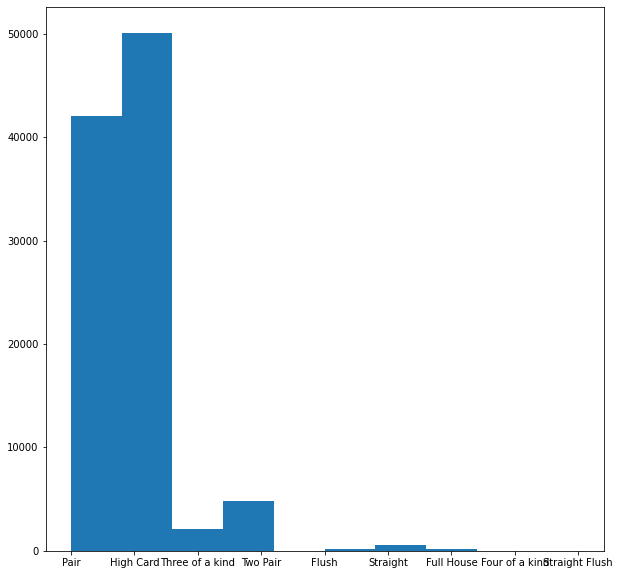

['Royal Flush', 'Straight Flush', 'Four of a kind', 'Full House', 'Flush', 'Straight', 'Three of a kind', 'Two Pair', 'Pair', 'High Card']

[0, 2, 29, 153, 218, 524, 2155, 4831, 42025, 50063]


In [10]:
def main(n):
  X=['null']*n
  i=0
  for i in range(n):
    deck=create(w,h)

  
    hand=draw(deck)


    splithand=split(hand)


    sorthand=sort(splithand)

    X[i]=finalhand(sorthand)
    i=i+1
  k=0
  Y=[0]*len(pos_hands)
  for k in range(len(pos_hands)):
    Y[k]=X.count(pos_hands[k])
    k=k+1
  plt.hist(X, 10)
  plt.rcParams["figure.figsize"]=(10,10)
  plt.show()
  print(pos_hands)
  print("")
  print(Y)
  return 


#Here we draw 100,000 hands, and comparing to the data from
# http://bender.astro.sunysb.edu/classes/numerical_methods/lectures/monte-carlo.pdf, 
#the numbers seem correct. Also the stronger hands are drawn less than each hand weaker than it, 
#showing that the power of each hand correlates correctly to the odds
#Below the graph you can see exactly how many times each hand occurred
main(100000)

Task: Make a simulation which makes a 14 day forecast of the weather.
Count how many days are sunny and how many are rainy. Run this for 50
simulations. Plot the average number of Sunny and Rainy days on the y-axis
and the number of simulations run so far on the x-axis.
Make a small amendment to the probabilities listed above and re-run the
simulation. Does this change the outcome significantly or hardly at all?

Result: The simulation showed with the probabilities given in the task that the sunny days will occur much more often than rainy days (average 11.24 days for sun and 2.76 for rain) When making minor adjustments, a fairly large difference is seen. Finally i made a simulation which seems more accurate to the netherlands, where we see 9.3 out of 14 days are rainy

The average sun days over 50 runs is: 11.24
The average rain days over 50 runs is: 2.76


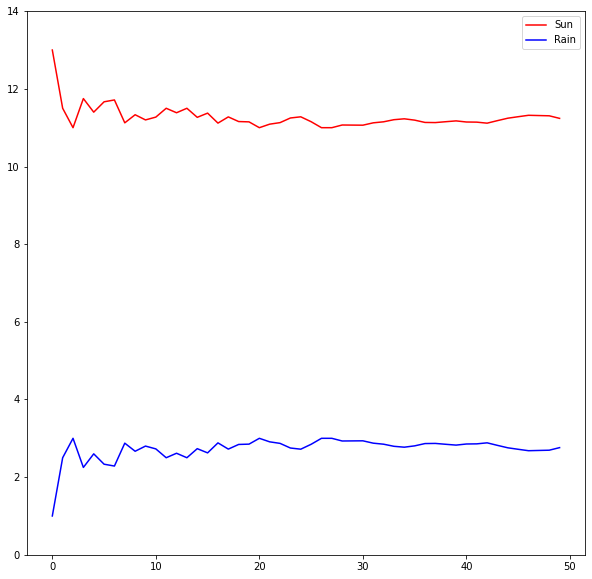

In [11]:
#Here we set how many days we want to forecast
forecastlength=14

#This function creates a list of the amnount of days we want to forecast, and fills them with null. \
#Then using np.random.choice, we fill the first element of the list.
# For the first element the task didnt specifiy if it shoould be sunny or rainy so i made it to be 50/50 to be one of either.
#For the other elements we used an if statement to check the previous element and if sun we used the prob 0.9 for sun tyhe next day and 0.1 for rain
#If rain 0.5 and 0.5 for both rain and sun. Once full we counted how many days were sunny and how many were rainy and returned the two values.
def ndayforecast(n):
  weather=['null']*n
  poss=['Sun', 'Rain']
  #1=sunny 2=rainy
  A=np.random.choice(poss,1,p=[0.5,0.5])
  weather[0]=A[0]
  for i in range(n-1):
    if weather[i]=='Sun':
      B=np.random.choice(poss,1,p=[0.9,0.1])
      weather[i+1]=B[0]
    elif weather[i]=='Rain':
      B=np.random.choice(poss,1,p=[0.5,0.5])
      weather[i+1]=B[0]
    else: weather[i+1]='null'
    i=i+1
  S=weather.count('Sun')
  R=weather.count('Rain')
  return S,R

#Here we create three lists, x, sun and rain.
#x represents the number of days 
#sun represents the average number of sunny days
#rain represents the average number of rainy days
#We find the average by adding up all previous elements in YS and YR and dividing by the amoount of elements we added up.
#Too check that this was done correctly the average can be added up
#Eg. 11.24 +2.76=14=total number of days.
#The function then plots the average sun and rain days in the graph below.
def main(numsim):
  x=[0]*numsim
  sun=[0]*numsim
  rain=[0]*numsim
  YS=0
  YR=0
  for i in range(numsim):
    S,R=ndayforecast(forecastlength)
    YS=YS+S
    YR=YR+R
    sun[i]=YS/(i+1)
    rain[i]=YR/(i+1)
    x[i]=i
  print("The average sun days over 50 runs is: " + str(sun[numsim-1]))
  print("The average rain days over 50 runs is: " + str(rain[numsim-1]))
  fig, ax = plt.subplots()
  ax.plot(x,sun,'r',label='Sun')
  ax.plot(x,rain,'b',label='Rain')
  leg = ax.legend()
  plt.ylim((0, forecastlength)) 

#The graph below represents a 14 day forecast simulated 50 times.
#It looks like the rain and sunny averages are mirrored which makes sense as they need to add up to 14 days
#At first the lines look rough but over the number of simulations the line smoothens out.
main(50)

The average sun days over 50 runs is: 8.3
The average rain days over 50 runs is: 5.7


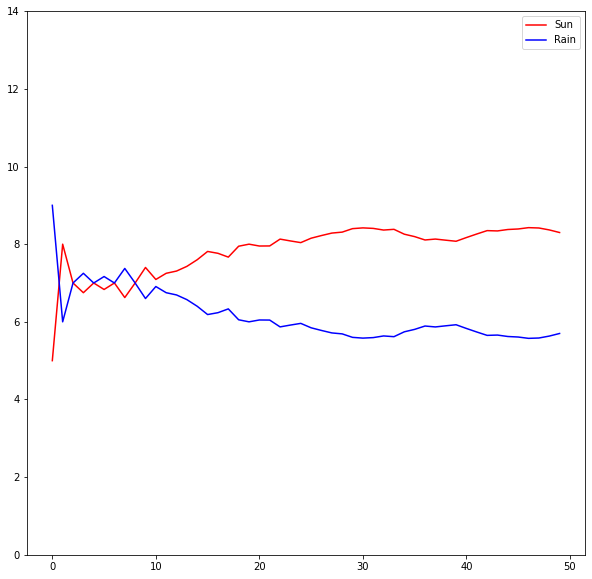

In [12]:

def ndayforecast(n):
  weather=['null']*n
  poss=['Sun', 'Rain']
  #1=sunny 2=rainy
  A=np.random.choice(poss,1,p=[0.5,0.5])
  weather[0]=A[0]
  for i in range(n-1):
    if weather[i]=='Sun':
      B=np.random.choice(poss,1,p=[0.7,0.3])
      weather[i+1]=B[0]
    elif weather[i]=='Rain':
      B=np.random.choice(poss,1,p=[0.5,0.5])
      weather[i+1]=B[0]
    else: weather[i+1]='null'
    i=i+1
  S=weather.count('Sun')
  R=weather.count('Rain')
  return S,R

#For this graph the probabilities for sun going to sun (0.9) or sun going to rain (0.1) were adjusted slightly(to 0.7 and 0.3). 
#Now the averages are closer together but it does show that a small change can have a fairly large impact on the forecast.
main(50)

The average sun days over 50 runs is: 4.7
The average rain days over 50 runs is: 9.3


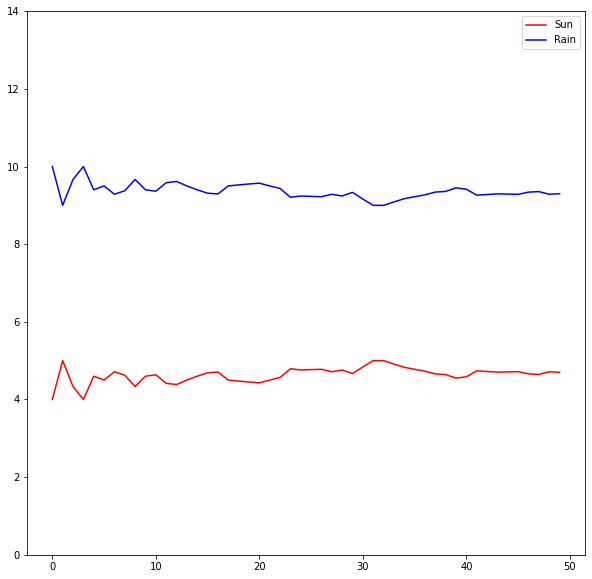

In [13]:
#Netherlands

def ndayforecast(n):
  weather=['null']*n
  poss=['Sun', 'Rain']
  #1=sunny 2=rainy
  A=np.random.choice(poss,1,p=[0.5,0.5])
  weather[0]=A[0]
  for i in range(n-1):
    if weather[i]=='Sun':
      B=np.random.choice(poss,1,p=[0.4,0.6])
      weather[i+1]=B[0]
    elif weather[i]=='Rain':
      B=np.random.choice(poss,1,p=[0.3,0.7])
      weather[i+1]=B[0]
    else: weather[i+1]='null'
    i=i+1
  S=weather.count('Sun')
  R=weather.count('Rain')
  return S,R

#This final graph represents what i think of the weather in the netherlands. 
#The probabilities were adjusted (S-->S 0.4 S-->R 0.6, R-->S=0.3 R-->R 0.7)
main(50)